In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl 
from functools import reduce


In [2]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
#city_data_df.head(10)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head(10)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
#pyber_data_df.head()

In [6]:
#create data frames for the summaries
total_rides = pyber_data_df.groupby(pyber_data_df["type"]).count()["ride_id"].rename("Total Rides")
total_drivers = city_data_df.groupby(city_data_df["type"]).sum()["driver_count"].rename("Total Drivers")
total_fares = pyber_data_df.groupby(pyber_data_df["type"]).sum()["fare"].rename("Total Fares")
avg_fare_per_ride = pyber_data_df.groupby(pyber_data_df["type"]).mean()["fare"].rename("Average Fare per Ride")
avg_fare_per_driver = (total_fares/total_drivers).rename("Average Fare per Driver")

#total_drivers

### Final Summary Dataframe

In [106]:
#concatenate the series into a single DF
dfs_to_concat = [total_rides,total_drivers,total_fares,avg_fare_per_ride, avg_fare_per_driver]
final_summary_df = pd.concat(dfs_to_concat, axis=1)
#remove index name
final_summary_df.index.name = None
#format df for display
final_summary_df.style.format({"Total Rides": "{:,}", 
                               "Total Drivers": "{:,}", 
                               "Total Fares": "${:,.2f}",
                               "Average Fare per Ride":"${:,.2f}",
                               "Average Fare per Driver":"${:,.2f}"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [8]:
#rename pyber_data_df column names
rename_columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}
pyber_data_df.rename(columns = rename_columns, inplace = True)

#set the index to date
pyber_data_df.set_index("Date", inplace=True, drop=False)

pyber_data_df


,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural


In [9]:
#Create a new DataFrame for fares and include only the Date, City Type, and Fare columns using the copy() method on the merged DataFrame.
fares_data_df = pyber_data_df[['Date','City Type','Fare']].copy()

#set index, drop extra date
fares_data_df.set_index("Date", inplace=True, drop=True)

#set index data type to datetime
fares_data_df.index = pd.to_datetime(fares_data_df.index)

#check the df with info()
fares_data_df.info()
fares_data_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [10]:
#Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
fares_by_type = fares_data_df.groupby([fares_data_df.index.date,'City Type']).sum()['Fare']

#convert series to df and set index
fares_by_type_df = pd.DataFrame(fares_by_type)
fares_by_type_df.reset_index('City Type', inplace=True, drop=False)
fares_by_type_df.index.name = 'Date'
fares_by_type_df.index = pd.to_datetime(fares_by_type_df.index)
#Use info to check on things
fares_by_type_df.info()
fares_by_type_df


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2019-01-01 to 2019-05-08
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  334 non-null    object 
 1   Fare       334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


,City Type,Fare
Date,,
2019-01-01,Rural,43.69
2019-01-01,Suburban,128.52
2019-01-01,Urban,127.78
2019-01-02,Rural,52.12
2019-01-02,Suburban,274.92
...,...,...
2019-05-06,Urban,181.20
2019-05-07,Rural,44.94
2019-05-07,Suburban,274.09


In [11]:
#Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row
fares_by_type_pivot_df = fares_by_type_df.pivot_table(index=fares_by_type_df.index, columns='City Type', values='Fare')

fares_by_type_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [12]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc
filtered_fares_by_type_pivot_df = fares_by_type_pivot_df.loc['2019-01-01':'2019-04-28']
filtered_fares_by_type_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [101]:
#Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.
weekly_fares_by_type_df = filtered_fares_by_type_pivot_df.resample('W-MON', label='left').sum()
weekly_fares_by_type_df = pd.DataFrame(weekly_fares_by_type_df)
weekly_fares_by_type_df

City Type,Rural,Suburban,Urban
Date,,,
2018-12-31,187.92,876.61,1879.70
2019-01-07,139.80,1080.40,2193.36
2019-01-14,233.85,1163.93,2105.90
2019-01-21,210.94,1285.13,1846.98
2019-01-28,361.50,1079.58,2085.77
2019-02-04,81.91,879.92,2200.85
2019-02-11,140.52,1394.86,2389.68
2019-02-18,448.07,1067.99,2156.88
2019-02-25,75.65,836.61,2619.82


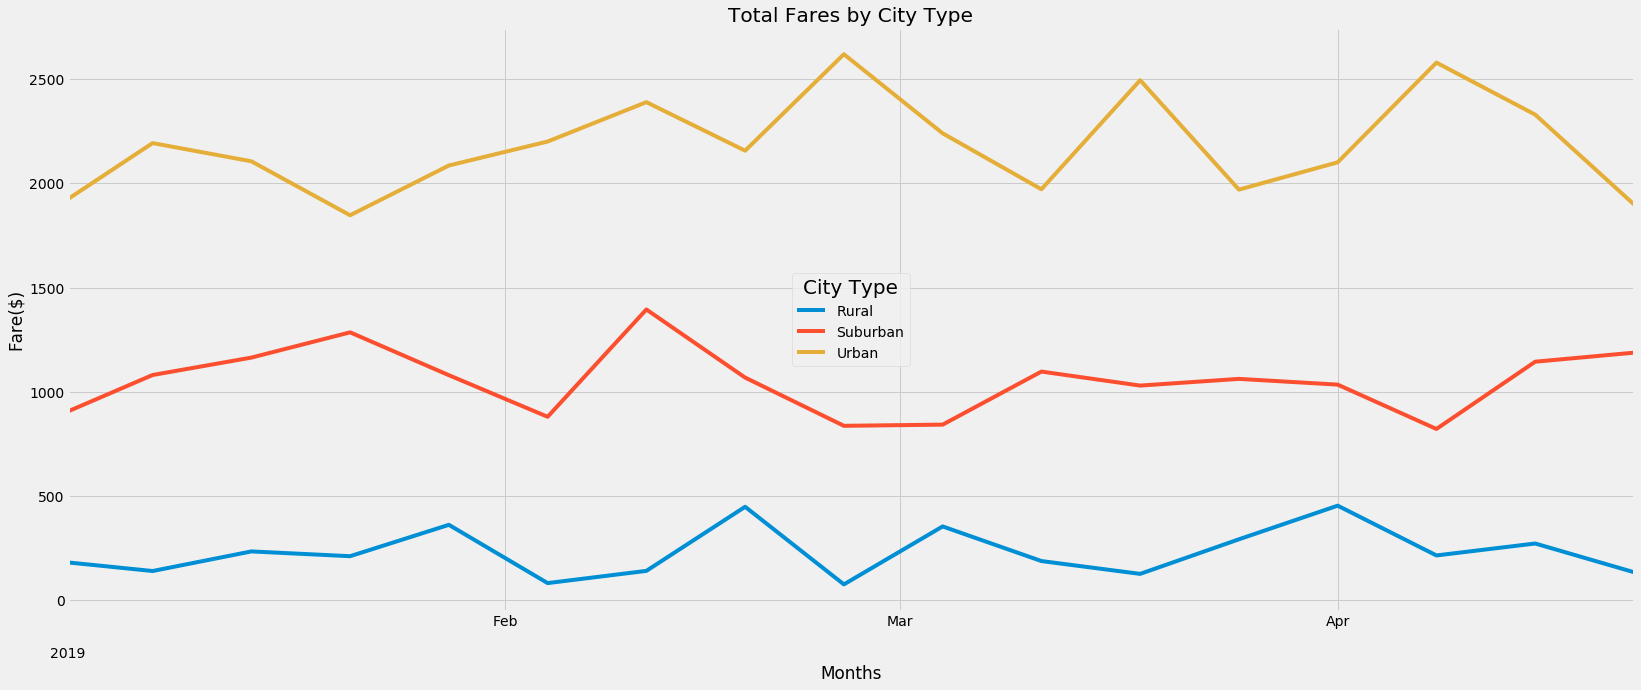

In [107]:
import matplotlib.dates as mdates
import datetime
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('\n\n%Y')
monthsFmt = mdates.DateFormatter('%b')

#Using the object-oriented interface method, plot the DataFrame you created in Step 12 using the df.plot() function. Things to consider with your plotting
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25,10))

#Plot it
ax.plot(weekly_fares_by_type_df)

ax.set_xlabel("Months")
ax.set_ylabel("Fare($)")
ax.set_title("Total Fares by City Type")

#ax.xtick_lables = pd.DatetimeIndex(weekly_fares_by_type_df.index).month
# format the ticks
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels())
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 4, 22)])

#add the minor tick grid
ax.xaxis.grid(which='minor')

#build the legend
ax.legend(weekly_fares_by_type_df,loc='center', title='City Type', title_fontsize=20)
plt.savefig("analysis/TotalFaresByCT.png")
#show the plot
plt.show()

